In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('SalaryData_Train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [3]:
numerical=[var for var in data.columns if data[var].dtypes!='O']
numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [4]:
data[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

(30161, 14)


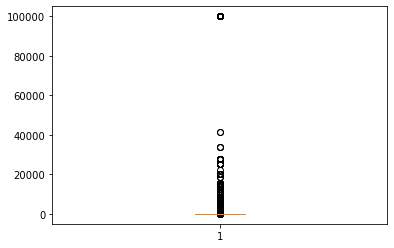

In [6]:
plt.boxplot(data["capitalgain"])
print(data.shape)

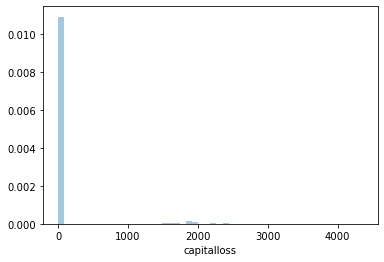

In [7]:
sns.distplot(data["capitalloss"])

(30161, 14)


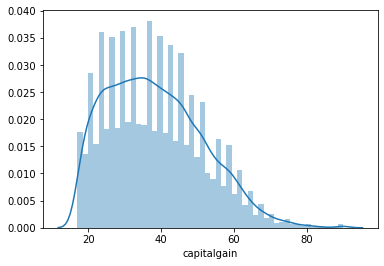

In [8]:
# remove outlier data from capitalgain variable :
data["capitalgain"] = data.loc[data["capitalgain"]<=20000]
sns.distplot(data["capitalgain"])
print(data.shape)

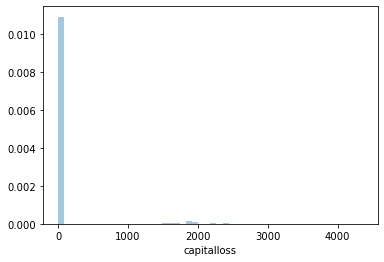

In [9]:
sns.distplot(data["capitalloss"])

(array([  511.,  1877.,  1995., 16581.,  3004.,  3736.,  1721.,   421.,
          184.,   131.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

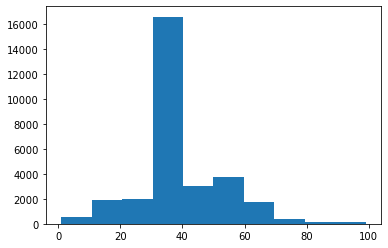

In [10]:
plt.hist(data["hoursperweek"])

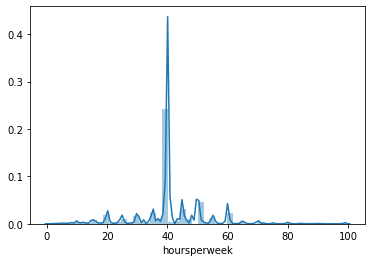

In [11]:
sns.distplot(data["hoursperweek"])

In [12]:
clean_data= data.dropna(axis=0)
clean_data.shape

(29929, 14)

In [13]:
data.shape

(30161, 14)

In [14]:
y=clean_data['Salary']
y.shape

(29929,)

In [15]:
train_data=clean_data.iloc[:,0:13]
train_data.shape

(29929, 13)

In [16]:
x=pd.get_dummies(train_data)
x.shape

(29929, 173)

In [17]:
# now split data for training and tesing purpose :
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=7)
x_train.shape, x_test.shape

((22446, 173), (7483, 173))

In [18]:
# Applying Gaussian Naive Baye's :

from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [19]:
y_pred = gnb.predict(x_test)
np.mean(y_pred == y_test)                # 64.07 % Tesing accuracy

0.6406521448616865

In [20]:
y_pred_2 = gnb.predict(x_train)
np.mean(y_pred_2 == y_train)            # 63.86 % Training accuracy

0.6385993049986635

In [21]:
# Now apply Feature Engineering to get feature which has high impact to predict Salary :
# Tree Based Feature Selection :

from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier()
dt_model.fit(x,y)

DecisionTreeClassifier()

In [22]:
print(dt_model.feature_importances_.round(2))

[0.09 0.14 0.04 0.11 0.01 0.01 0.02 0.01 0.01 0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.
 0.   0.22 0.   0.   0.   0.   0.01 0.   0.01 0.01 0.01 0.   0.01 0.01
 0.   0.01 0.   0.01 0.01 0.01 0.   0.   0.   0.   0.   0.01 0.   0.
 0.01 0.   0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.01 0.   0.  ]


In [23]:
l= dt_model.feature_importances_>0.01
print(np.where(l==True))

(array([ 0,  1,  2,  3,  5,  6,  8, 29, 37, 43, 45], dtype=int64),)


In [24]:
new_x=x.iloc[:,[ 0,  1,  2,  3,  5,  6,  8, 29, 37, 43]]
new_x

,age,educationno,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-not-inc,maritalstatus_ Married-civ-spouse,occupation_ Exec-managerial,occupation_ Prof-specialty
0,39,13,0,40,0,0,0,0,0,0
1,50,13,0,13,0,0,1,1,1,0
2,38,9,0,40,0,1,0,0,0,0
3,53,7,0,40,0,1,0,1,0,0
4,28,13,0,40,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,38,0,1,0,1,0,0
30157,40,9,0,40,0,1,0,1,0,0
30158,58,9,0,40,0,1,0,0,0,0
30159,22,9,0,20,0,1,0,0,0,0


In [25]:

# again split the data to train for Gaussian Naive Bayes :
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(new_x, y, test_size=0.25, random_state=7)
x_new_train.shape, x_new_test.shape

((22446, 10), (7483, 10))

In [26]:
# apply Gaussian Naive Bayes after Feature selection :
gnb.fit(x_new_train, y_new_train)

GaussianNB()

In [27]:
# training accuracy :
y_train_pred = gnb.predict(x_new_train)
np.mean(y_train_pred == y_new_train)          # 79.51 % Training accuracy

0.7951973625590305

In [28]:
# predict:
y_new_pred = gnb.predict(x_new_test)
np.mean(y_new_test == y_new_pred)                # 79.23 % Testing accuracy

0.7923292797006548

In [29]:
# multinomial Naive Bayes:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(x_new_train,y_new_train)

MultinomialNB()

In [30]:
y_train_pred_mnb= mnb.predict(x_new_test)
print(np.mean(y_new_test==y_train_pred_mnb))

0.7511693171188026


In [31]:
y_train_pred_mnb = mnb.predict(x_new_train)
np.mean(y_train_pred_mnb == y_new_train)  

0.7606700525706139

In [32]:
# Therefor , base on different features accuracy we can conclude that Feature obtain using Tree Based Feature selection
# and applying Gaussian Naive Bayes on Extracted Feature data we get model which performs good for Training and Testing data.

# TESTING DATA :
test_data = pd.read_csv('SalaryData_Test.csv')
print(test_data.shape)        #(15060, 14)
test_data

(15060, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [33]:
# make dummy data to extract features :
dummy_test_data= pd.get_dummies(test_data)
dummy_test_data.shape

(15060, 104)

In [34]:
final_test_data=dummy_test_data[new_x.columns]
final_test_data

,age,educationno,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-not-inc,maritalstatus_ Married-civ-spouse,occupation_ Exec-managerial,occupation_ Prof-specialty
0,25,7,0,40,0,1,0,0,0,0
1,38,9,0,50,0,1,0,1,0,0
2,28,12,0,40,1,0,0,1,0,0
3,44,10,0,40,0,1,0,1,0,0
4,34,6,0,30,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,40,0,1,0,0,0,1
15056,39,13,0,36,0,1,0,0,0,1
15057,38,13,0,50,0,1,0,1,0,1
15058,44,13,0,40,0,1,0,0,0,0


In [35]:
test_y = test_data["Salary"]

In [36]:
# Testing Test data on Gaussian Navie Bayes 
test_data_pred = gnb.predict(final_test_data)
np.mean(test_data_pred==test_y)

0.7952191235059761

In [37]:
# Apply Multinomial Naive Bayes :
test_data_pred_mnb = mnb.predict(final_test_data)
np.mean(test_data_pred_mnb == test_y)  

0.7549136786188579

In [38]:
# Therefor, we can conclude that model created using Gaussian Naive Bayes and exctracted Features using Tree Based feature-
# selection method gives us good Training and Testing accuracy.